🎯 Goal of the Section
To understand how controlling the depth of a decision tree impacts a model’s ability to generalize.
Too deep? It overfits. Too shallow? It underfits. You’ll learn how to find the sweet spot. 🍬
🧠 What You’ll Learn
How to train decision trees with and without depth constraints.
The difference between overfitting and underfitting using visualization and accuracy.
How to use max_depth to avoid models that memorize training data.
How to compare tree performance across different depths using graphs.
🛠️ Key Concepts Practiced
| Concept                    | Description                                      |
| -------------------------- | ------------------------------------------------ |
| `DecisionTreeClassifier()` | Scikit-learn model used for classification       |
| `max_depth`                | Limits how many levels the tree can grow         |
| `plot_tree()`              | Visualizes how the decision tree splits the data |
| `train_test_split()`       | Splits your data for model testing               |
| `accuracy_score()`         | Evaluates how well your model is doing           |
🧪 Real-World Insight
You rarely want a model that’s “too smart” (overfitting). This section teaches you how to intentionally make your model simpler to improve real-world performance.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


📌 This sets up your environment and loads the Iris flower dataset for classification.

In [2]:
# Train a deep (uncontrolled) decision tree
deep_tree = DecisionTreeClassifier(random_state=42)
deep_tree.fit(X_train, y_train)

# Predict and evaluate
y_pred_deep = deep_tree.predict(X_test)
print("Accuracy (deep tree):", accuracy_score(y_test, y_pred_deep))

Accuracy (deep tree): 1.0


📌 You’ll likely get high training accuracy, but test accuracy may not generalize well.

In [3]:
# Train a shallow tree
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state=42)
shallow_tree.fit(X_train, y_train)

# Predict and evaluate
y_pred_shallow = shallow_tree.predict(X_test)
print("Accuracy (shallow tree):", accuracy_score(y_test, y_pred_shallow))

Accuracy (shallow tree): 0.9777777777777777


📌 Limiting tree depth may reduce overfitting, at the potential cost of accuracy.

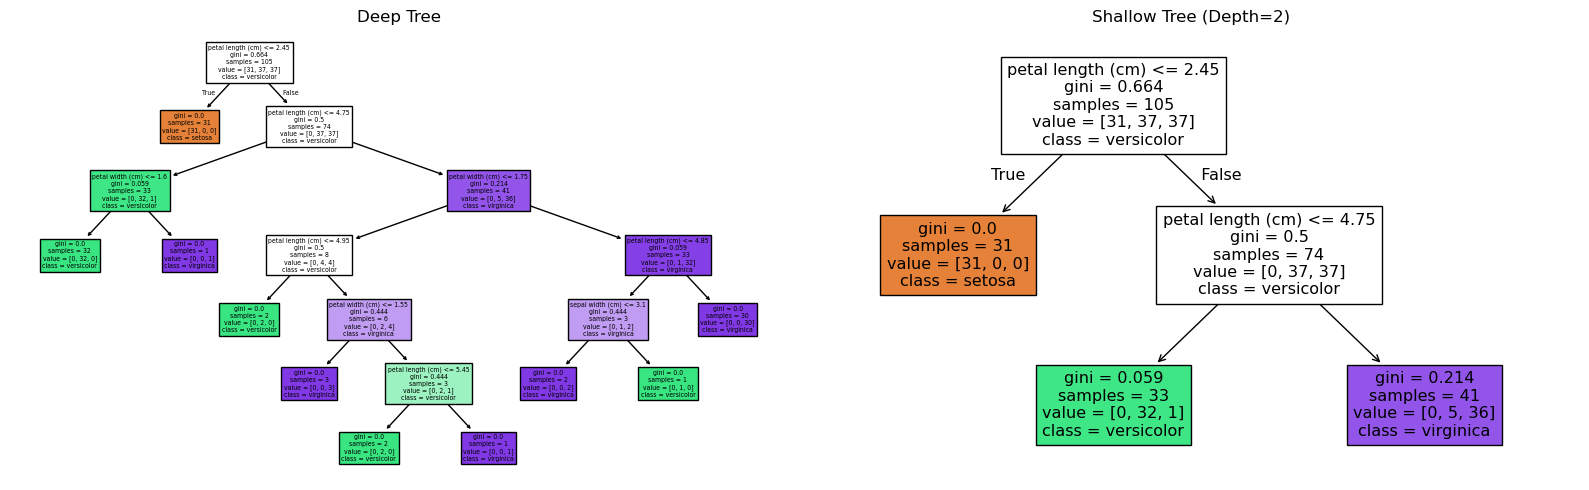

In [4]:
# Plot both trees side-by-side
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
plot_tree(deep_tree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Deep Tree")

plt.subplot(1, 2, 2)
plot_tree(shallow_tree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Shallow Tree (Depth=2)")

plt.tight_layout()
plt.show()


📌 Visual comparison shows how a deep tree captures more patterns (maybe too many).

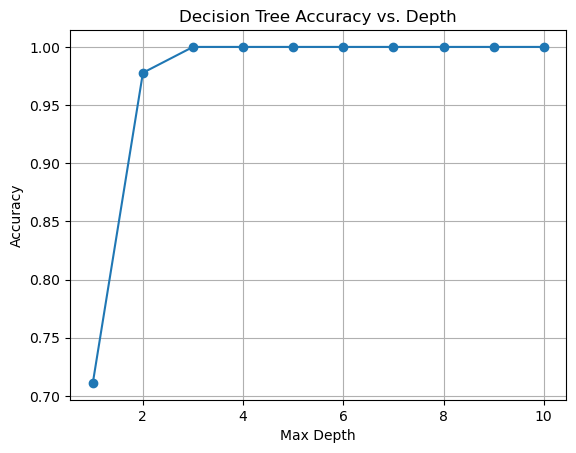

In [5]:
# Try different depths
depths = list(range(1, 11))
accuracies = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    accuracies.append(acc)

# Plot depth vs accuracy
plt.plot(depths, accuracies, marker='o')
plt.title("Decision Tree Accuracy vs. Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


📌 This helps you find the “sweet spot” between underfitting and overfitting.